# Introductie Jupyter Notebook en Scikit-learn

Zoals tijdens het theoriecollege is toegelicht, maken we vanaf deze week gebruik van Jupyter Notebooks, een feitelijke standaard voor het *rapid prototyping* van machine learning projecten. Het grote voordeel van notebooks is dat je de documentatie (in [markdown](https://www.markdownguide.org/)) direct tussen je runbare code hebt staan. Hoewel oorspronkelijk ontwikkeld voor Python zijn er inmiddels voor de meeste talen kernels ontwikkeld, zodat je ook Java, Go of PHP in notebooks kunt schrijven.

Een tweede stap die we nu gaan zetten in gebruik maken van een bibliotheek om het zware werk voor ons over te nemen: [skikit learn](https://scikit-learn.org/stable/index.html). Tot nu toe schreven we alle code zelf, maar in het echt maak je gebruik van deze bibliotheek: die is sneller en makkelijker en stelt je in staat om je te richten op het maken en beoordelen van modellen in plaats van het goedlaten werken van feitelijk vrij triviale programmacode.

EÃ©n van de voordelen van sklearn is dat de meest gebruikte datasets [standaard in deze bibliotheek](https://scikit-learn.org/stable/datasets.html) zitten. Veel van de voorbeelden waar we de voorbije weken mee gewerkt hebben, zul je hierin terugvinden.

In deze opgave maken we gebruik van de [California Housing dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices). Run de volgende cel om de methode te importeren die deze dataset kan laden. Bestudeer [de documentatie](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) om te weten te komen wat er in deze dataset is opgeslagen en hoe je vervolgens de data daadwerkelijk laadt. 

In [142]:
# https://stackoverflow.com/a/49174340
# Haal de onderstaande regel uit het commentaar als je SSL-errors krijgt:
# ssl._create_default_https_context = ssl._create_unverified_context
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np

# Opdracht 1: data laden en inspecteren

Gebruik de onderstaande cel om de methode `fetch_california_housing` aan te roepen. Mocht je bij het laden SSL-errors krijgen, probeer dan de eerste regel in de bovenstaande cel uit het commentaar te halen en run die cel nogmaals. Gebruik `feature_names` om de namen van de eigenschappen van de dataset te weten te komen. Zorg ervoor dat je de *data* van het resultaat in een variabele `X` zet, en de *target* in een variabele `y`.

In [143]:
# YOUR CODE HERE
Dataset = fetch_california_housing()

y = Dataset['target']
X = Dataset['data']



Zoals altijd maken we ook een paar visualisaties van de data om een beeld te krijgen van wat er zoal in zit. We beginnen met een scatter-plot; alleen dit keer plotten we niet de $y$-vector tegen een eigenschap uit de $X$-matrix; omdat we weten dat we te maken hebben met geografische data, is het leuker om de lengte- en breedtegraden tegenover elkaar te plotten. Maar gebruik van [`matplotlib.pyplot.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) om deze twee gegevens (*Longitude* en *Latitude*, respectievelijk) te plotten.
Als je het goed hebt gedaan, kun je in de resulterende plot de kustlijn van CaliforniÃ« herkennen.

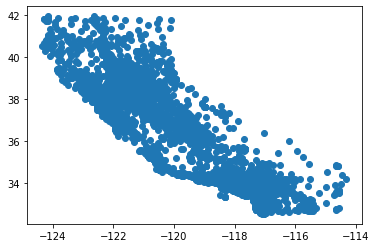

In [144]:
#YOUR CODE HERE

long = []
lat = []
for i in range(len(Dataset['data'])):
    long.append(Dataset['data'][i][7])
    lat.append(Dataset['data'][i][6])

plot = plt.scatter(long, lat)





Zoals je in de documentatie hebt gelezen, is de target-value de gemiddelde waarde van de huizen in die omgeving, uitgedrukt in honderdduizend dollar. Natuurlijk moeten we wat statistieken uit deze target-vector halen. Vul onderstaande cel aan, zodat de juiste waarden worden afgedrukt. Maar vervolgens gebruik van [pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) om een histogram van deze data te plotten. Beargumenteer op basis van de statistische gegevens in hoeveel `bins` je deze histogram moet onderverdelen.

In [145]:
import statistics as st
# YOUR CODE HERE
# vervang '0' door de juiste code
min_value = 0
max_value = 0
stdev = 0
gemiddelde = 0

medHouseValue = []
for i in range(len(Dataset['data'])):
       medHouseValue.append(Dataset['data'][i][1])

gemiddelde = st.mean(medHouseValue)
stdev = st.stdev(medHouseValue)
min_value = st.median_low(medHouseValue)
max_value = st.median_high(medHouseValue)

print ('==== DATA UIT DE TARGET-VECTOR ====')
print (f'Gemiddelde: {gemiddelde:>10.2f}')
print (f'Minimum: {min_value:>10.2f}')
print (f'Maximum: {max_value:>10.2f}')
print (f'StdDev: {stdev:>10.2f}')


==== DATA UIT DE TARGET-VECTOR ====
Gemiddelde:      28.64
Minimum:      29.00
Maximum:      29.00
StdDev:      12.59


Een belangrijke stap om een beeld te krijgen van de data in de set is door gebruik te maken van een [histogram](https://nl.wikipedia.org/wiki/Histogram). EÃ©n van de belangrijke vragen daarbij is in hoeveel `bins` je de data moet verdelen. Daarvoor zijn grofweg twee methoden: [Sturge's Rule](https://www.statology.org/sturges-rule/) en [Freedman-Diaconis rule](). Bestudeer [deze blog hierover](https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8) maak beide histogrammen. Let op dat het aantal `bins` een *geheel getal* moet zijn.

Als het goed is, kom je in het eerste geval op 16 `bins` en in het tweede geval op 46. Welke van beide histogrammen vind je beter en waarom?

(array([ 315.,  579.,  675.,  794., 1695., 2235., 1293., 1663., 1420.,
        1499., 2990., 1300.,  968., 1003.,  620., 1591.]),
 array([ 1.    ,  4.1875,  7.375 , 10.5625, 13.75  , 16.9375, 20.125 ,
        23.3125, 26.5   , 29.6875, 32.875 , 36.0625, 39.25  , 42.4375,
        45.625 , 48.8125, 52.    ]),
 <BarContainer object of 16 artists>)

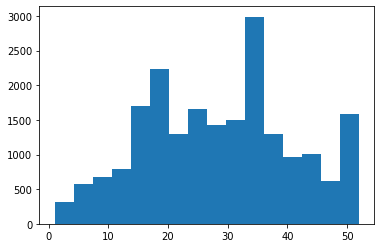

In [146]:
import math
# histogram met Sturge's Rule
m,n = X.shape

# YOUR CODE HERE
sturge = math.ceil(math.log2(m))+1
plt.hist(x=medHouseValue, bins=sturge)

(array([  62.,   62.,  435.,  160.,  175.,  411.,  264.,  492.,  302.,
         412., 1283.,  698.,  570.,  967.,  446.,  847.,  478.,  566.,
        1107.,  471.,  461.,  934.,  565., 1304.,  824.,  862.,  931.,
         369.,  304.,  664.,  353.,  650.,  245.,  198.,  311.,  136.,
        1321.]),
 array([ 1.        ,  2.37837838,  3.75675676,  5.13513514,  6.51351351,
         7.89189189,  9.27027027, 10.64864865, 12.02702703, 13.40540541,
        14.78378378, 16.16216216, 17.54054054, 18.91891892, 20.2972973 ,
        21.67567568, 23.05405405, 24.43243243, 25.81081081, 27.18918919,
        28.56756757, 29.94594595, 31.32432432, 32.7027027 , 34.08108108,
        35.45945946, 36.83783784, 38.21621622, 39.59459459, 40.97297297,
        42.35135135, 43.72972973, 45.10810811, 46.48648649, 47.86486486,
        49.24324324, 50.62162162, 52.        ]),
 <BarContainer object of 37 artists>)

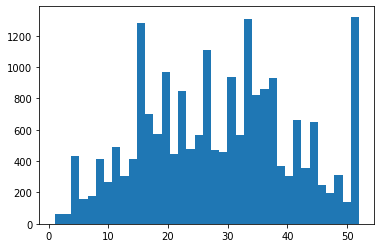

In [147]:
# histogram met Freedman-Diaconis rule
m,n = X.shape

# YOUR CODE HERE
freed = np.histogram_bin_edges(a=medHouseValue, bins='fd')
plt.hist(x=medHouseValue, bins=freed)

## Opdracht 2: Lineaire regressie

Nu gaan we de *features* van deze dataset gebruiken om een voorspelling te doen van de waarde van een huis. In week 1 hebben we de wiskunde daarvan helemaal uitgeprogrammeerd; nu maken we gebruik van ['sklearn.linear_model.linear_regression'](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Verdeel de data in 20% testdata en 80% trainingsdata. Maak hiervoor gebruik van [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html). Laad de data opnieuw in met de parameter `return_X_y` op `True`, zodat je direct de *features* en de corresponderende *targets* hebt. Waarom is deze split ook al weer nodig?

Gebruik vervolgens de methode [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) om het model te trainen. 

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression().fit(X_train, y_train)

Gebruik nu de methode [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) om op basis van de test-data een uitspraak te doen over hoe goed het model presteert. Gebruik hiervoor de methode [`mean_square_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) uit `sklearn.metrics`. Hoe vind je dat het model presteert? Wat zou je kunnen doen om het model te verbeteren?

In [163]:
from sklearn.metrics import mean_squared_error
#YOUR CODE HERE
y_pred = model.predict(X_test)
pred = mean_squared_error(y_test, y_pred)
pred
#0.5 is niet heel goed maar ook niet heel slecht er is zeker ruimte voor verbetering


0.5640574681987877

Bestudeer tenslotte met behulp van het `coef_`-attribuut van het getrainde model om te weten te komen wat de formule is die het model gebruikt. Welke features zijn het belangrijkst en welke minder?

In [169]:
#YOUR CODE HERE
model.coef_

array([ 4.47290701e-01,  9.80853297e-03, -1.25037064e-01,  8.31481060e-01,
        4.84441396e-08, -3.49544180e-03, -4.17986934e-01, -4.34664572e-01])